In [1]:
from matplotlib     import pyplot  as plt
import glob         as gb
import matplotlib   as mp
import numpy        as np
import pandas       as pd
import xarray       as xr
import mitgcm_tools
import warnings

plt.rcParams['xtick.labelsize'] ='large'
plt.rcParams['ytick.labelsize'] ='large'
plt.rcParams['axes.labelsize' ] ='large'
plt.rcParams['legend.fontsize'] ='large'
plt.rcParams['figure.titlesize']='large'
plt.rcParams['font.size']       ='13'

def fix_contours(fax):
    s=np.shape(fax)
    x=s[0]

    if len(s)==1:
        for i in np.arange(x):
            try:
                for c in fax[i].collections:
                    if c in ['PathCollection']:
                        c.set_edgecolor("face")
                fax[i].set_facecolor("black")
            except (AttributeError):
                try:
                    fax[i].solids.set_edgecolor("face")
                except (AttributeError):
                    raise
    else:
        y=s[1]
        for i in np.arange(x):
            for j in np.arange(y):
                try:
                    for c in fax[i,j].collections:
                        if c in ['PathCollection']:
                            c.set_edgecolor("face")
                    fax[i,j].set_facecolor("black")
                except (AttributeError):
                    try:
                        fax[i,j].solids.set_edgecolor("face")
                    except (AttributeError):
                        raise
    return fax

### Load in grid files for basin with exponential and linear continental slopes

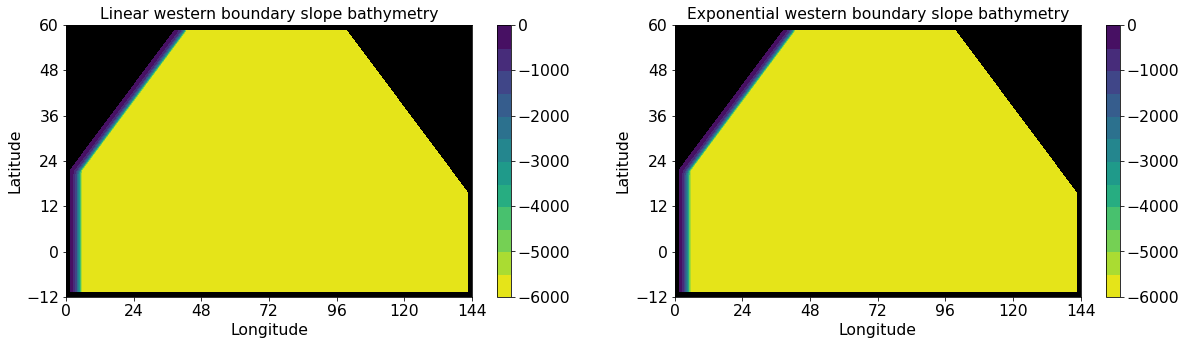

In [2]:
model_dir='/nobackup1/jml1/Idealized_north_pacific_ecosystem/'
#expdir='run_expslp/model_output/run_expslp_global/'
#lindir='run_linslp/model_output/run_linslp_global/'
#expdir='run_expslp_12s/model_output/run_expslp_12s_global2/'
#lindir='run_linslp_12s/model_output/run_linslp_12s_global/'
lindir='run_expslp_12s_v2/model_output/run_expslp_12s_v2_global/'
expdir='run_1deg_expslp_12s_salt_v2/model_output/run_expslp_global/'
#expdir='run_3deg_expslp_12s/model_output/run_expslp_global/'

grid_exp,xgrid_exp=mitgcm_tools.loadgrid(model_dir+expdir+'grid.*.nc',basin_masks=False) # ,chunking={'X':6,'Y':6,'Z':6}
grid_exp=grid_exp.transpose('XC','XG','YC','YG','ZC','ZG','ZL','ZR') #.chunk({'XG':6,'YG':6,'ZG':6,'ZL':6,'ZR':6})
grid_lin,xgrid_lin=mitgcm_tools.loadgrid(model_dir+lindir+'grid.*.nc',basin_masks=False)
grid_lin=grid_lin.transpose('XC','XG','YC','YG','ZC','ZG','ZL','ZR')

f1, f1ax = plt.subplots(figsize=(20,5),ncols=2,nrows=1)
f1cb =f1ax.copy()
f1cax=f1ax.copy()
f1cax[0]=f1ax[0].contourf(grid_lin.lonc,grid_lin.latc,-1*grid_lin.Depth*grid_lin.cmask.isel(ZC=0),
                          levels=np.arange(-6000,500,500),cmap='viridis_r')
f1cb [0]=plt.colorbar(f1cax[0],ax=f1ax[0])
f1ax[0].set(xlim=(0,144),xticks=np.arange(0,168,24),ylim=(-12,60),yticks=np.arange(-12,72,12),
            title='Linear western boundary slope bathymetry',xlabel='Longitude',ylabel='Latitude')
f1cax[1]=f1ax[1].contourf(grid_exp.lonc,grid_exp.latc,-1*grid_exp.Depth*grid_exp.cmask.isel(ZC=0),
                          levels=np.arange(-6000,500,500),cmap='viridis_r')
f1cb [1] =plt.colorbar(f1cax[1],ax=f1ax[1])
f1ax[1].set(xlim=(0,144),xticks=np.arange(0,168,24),ylim=(-12,60),yticks=np.arange(-12,72,12),
            title='Exponential western boundary slope bathymetry',xlabel='Longitude',ylabel='Latitude')
f1ax=fix_contours(f1ax)
f1ax=fix_contours(f1cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f1.savefig('/home/jml1/Jupyter_Notebooks/inp_bathy.pdf',facecolor=f1.get_facecolor(), edgecolor='none',bbox_inches='tight')

### Load fields for display

In [3]:
'''
ocediag     = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'oceDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
gmdiag      = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'gmDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
oce_flxdiag = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'flxDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
oce_surfdiag= mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'surfDiag.*.nc'))[-1],
                            strange_axes={'Zmd000001':'ZC','Zd000001':'ZL'} ,grid=grid_exp,chunking={'T':40})
alk_flxdiag = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'alk_flxDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
dic_flxdiag = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'dic_flxDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
dic_surfdiag= mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'dic_surfDiag.*.nc'))[-1],
                            strange_axes={'Zmd000001':'ZC','Zd000001' :'ZL'},grid=grid_exp,chunking={'T':40})
po4_flxdiag = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'po4_flxDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
do2_flxdiag = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+expdir+'do2_flxDiag.*.nc'))[-1],
                            strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
'''
ocediag     = mitgcm_tools.open_ncfile(model_dir+expdir+'oceDiag.*.nc'     ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
gmdiag      = mitgcm_tools.open_ncfile(model_dir+expdir+'gmDiag.*.nc'      ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
oce_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'flxDiag.*.nc'     ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
oce_surfdiag= mitgcm_tools.open_ncfile(model_dir+expdir+'surfDiag.*.nc'    ,
                                       strange_axes={'Zmd000001':'ZC','Zd000001':'ZL'} ,grid=grid_exp,chunking={'T':40})
alk_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'alk_flxDiag.*.nc' ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
dic_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'dic_flxDiag.*.nc' ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
dic_surfdiag= mitgcm_tools.open_ncfile(model_dir+expdir+'dic_surfDiag.*.nc',
                                       strange_axes={'Zmd000001':'ZC','Zd000001' :'ZL'},grid=grid_exp,chunking={'T':40})
po4_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'po4_flxDiag.*.nc' ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
do2_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'do2_flxDiag.*.nc' ,
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})

#data_parm= mitgcm_tools.getparm('input/data')
#data_dic = mitgcm_tools.getparm('input/data.dic')
forcing = xr.Dataset(
   coords={
       "XC": ("XC", grid_exp['XC'].values),
       "YC": ("YC", grid_exp['YC'].values),
       "RF": ("RF", grid_exp['ZG'].values),
       "RC": ("RC", grid_exp['ZC'].values),
       "time":("time",np.arange(0.5,12.5,1))
   })

forcing['sst_relax'] = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../sst_relax.bin", 
                                            sizearr=(12,  grid_exp.dims['YC'],grid_exp.dims['XC']                    ),
                                            prec='>f4'),coords=[forcing['time'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['time','YC','XC'])
forcing['sss_relax'] = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../sss_relax.bin", 
                                            sizearr=(12,  grid_exp.dims['YC'],grid_exp.dims['XC']                    ),
                                            prec='>f4'),coords=[forcing['time'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['time','YC','XC'])
forcing['taux']      = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../taux_forc.bin", 
                                            sizearr=(12,  grid_exp.dims['YC'],grid_exp.dims['XC']                    ),
                                            prec='>f4'),coords=[forcing['time'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['time','YC','XC'])
forcing['theta_sbdy']= xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../theta_sbdy.bin",
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])
forcing['alk_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../alk_sbdy.bin",  
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])
forcing['dic_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../dic_sbdy.bin",  
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])
forcing['po4_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../po4_sbdy.bin",  
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])
forcing['do2_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../do2_sbdy.bin",  
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])
forcing['tsbdy_mask']= xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../theta_rbcs_mask.bin",
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])
forcing['psbdy_mask']= xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../ptr_rbcs_mask.bin",
                                            sizearr=(grid_exp.dims['ZC'],grid_exp.dims['YC'],grid_exp.dims['XC']),
                                            prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],
                                            dims=['ZC','YC','XC'])

The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes

In [4]:
# Calculate barotropic streamfunction to show the gyres
gmdiag['GM_UVEL']=(gmdiag.GM_PsiX.differentiate('ZL').interp(ZL=grid_exp.ZC)*-1)
gmdiag['GM_VVEL']=(gmdiag.GM_PsiY.differentiate('ZL').interp(ZL=grid_exp.ZC)*-1)

ocediag['URES'] = ocediag['UVEL'] + gmdiag['GM_UVEL']
ocediag['VRES'] = ocediag['VVEL'] + gmdiag['GM_VVEL']

baro_mask=grid_exp.umask.interp(YC=grid_exp.coords['YG'],method='linear')
ubaro=(((ocediag['URES'] * grid_exp.HFacW * grid_exp.drF * grid_exp.dyG).sum(dim='ZC').sel(YC=slice(None, None, -1)) .cumsum('YC')).sel(YC=slice(None, None, -1)).interp(YC=grid_exp.coords['YG'],method='linear'))*baro_mask.isel(ZC=0)
vbaro=(  ocediag['VRES'] * np.cos(grid_exp.coords['YG']*(np.pi/180)) * grid_exp.HFacS * grid_exp.drF * grid_exp.dxG).sum(dim='ZC').cumsum('XC').interp(XC=grid_exp.coords['XG'],method='linear')*baro_mask.isel(ZC=0)
baro =( ubaro+vbaro)

# Calculate barotropic streamfunction for linear slope to show the gyres
locediag     = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+lindir+'oceDiag.*.nc'))[-1],
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
lgmdiag      = mitgcm_tools.open_ncfile(sorted(gb.glob(model_dir+lindir+'gmDiag.*.nc'))[-1],
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})

lgmdiag['GM_UVEL']=(lgmdiag.GM_PsiX.differentiate('ZL').interp(ZL=grid_lin.ZC)*-1)
lgmdiag['GM_VVEL']=(lgmdiag.GM_PsiY.differentiate('ZL').interp(ZL=grid_lin.ZC)*-1)

locediag['URES'] = locediag['UVEL'] + lgmdiag['GM_UVEL']
locediag['VRES'] = locediag['VVEL'] + lgmdiag['GM_VVEL']

lbaro_mask=grid_lin.umask.interp(YC=grid_lin.coords['YG'],method='linear')
lubaro=(((locediag['URES'] * grid_lin.HFacW * grid_lin.drF * grid_lin.dyG).sum(dim='ZC').sel(YC=slice(None, None, -1)) .cumsum('YC')).sel(YC=slice(None, None, -1)).interp(YC=grid_lin.coords['YG'],method='linear'))*lbaro_mask.isel(ZC=0)
lvbaro=(  locediag['VRES'] * np.cos(grid_lin.coords['YG']*(np.pi/180)) * grid_lin.HFacS * grid_lin.drF * grid_lin.dxG).sum(dim='ZC').cumsum('XC').interp(XC=grid_lin.coords['XG'],method='linear')*lbaro_mask.isel(ZC=0)
lbaro =( lubaro+lvbaro)

The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL


In [5]:
# Calculate overturning streamfunction
# Meridional Eulerian SF: calculate first intergral and then second integral (partial summation) over levels
meul =  (ocediag['VVELMASS']  *np.cos(grid_exp.coords['YG']*(np.pi/180))*grid_exp.HFacS*grid_exp.dxG*grid_exp.drF).sum('XC').cumsum('ZC')
medd =  (gmdiag['GM_VVEL']*np.cos(grid_exp.coords['YG']*(np.pi/180))*grid_exp.HFacS*grid_exp.dxG*grid_exp.drF).sum('XC').cumsum('ZC')
mres =  (ocediag['VRES']  *np.cos(grid_exp.coords['YG']*(np.pi/180))*grid_exp.HFacS*grid_exp.dxG*grid_exp.drF).sum('XC').cumsum('ZC')
#mres = meul+medd

# Zonal Eulerian SF: calculate first intergral and then second integral (partial summation) over levels
zeul = -(ocediag['UVELMASS']  *grid_exp.HFacW*grid_exp.dyG*grid_exp.drF).sum('YC').cumsum('ZC')
zedd = -(gmdiag['GM_UVEL']*grid_exp.HFacW*grid_exp.dyG*grid_exp.drF).sum('YC').cumsum('ZC')
zres = -(ocediag['URES']  *grid_exp.HFacW*grid_exp.dyG*grid_exp.drF).sum('YC').cumsum('ZC')
#zres = zeul+zedd

# Meridional Eulerian SF: calculate first intergral and then second integral (partial summation) over levels
lmeul =  (locediag['VVELMASS']  *np.cos(grid_lin.coords['YG']*(np.pi/180))*grid_lin.HFacS*grid_lin.dxG*grid_lin.drF).sum('XC').cumsum('ZC')
lmedd =  (lgmdiag['GM_VVEL']*np.cos(grid_lin.coords['YG']*(np.pi/180))*grid_lin.HFacS*grid_lin.dxG*grid_lin.drF).sum('XC').cumsum('ZC')
lmres =  (locediag['VRES']  *np.cos(grid_lin.coords['YG']*(np.pi/180))*grid_lin.HFacS*grid_lin.dxG*grid_lin.drF).sum('XC').cumsum('ZC')
#lmres = lmeul+lmedd

# Zonal Eulerian SF: calculate first intergral and then second integral (partial summation) over levels
lzeul = -(locediag['UVELMASS']  *grid_lin.HFacW*grid_lin.dyG*grid_lin.drF).sum('YC').cumsum('ZC')
lzedd = -(lgmdiag['GM_UVEL']*grid_lin.HFacW*grid_lin.dyG*grid_lin.drF).sum('YC').cumsum('ZC')
lzres = -(locediag['URES']  *grid_lin.HFacW*grid_lin.dyG*grid_lin.drF).sum('YC').cumsum('ZC')
#lzres = lzeul + lzedd

### Do some plots

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


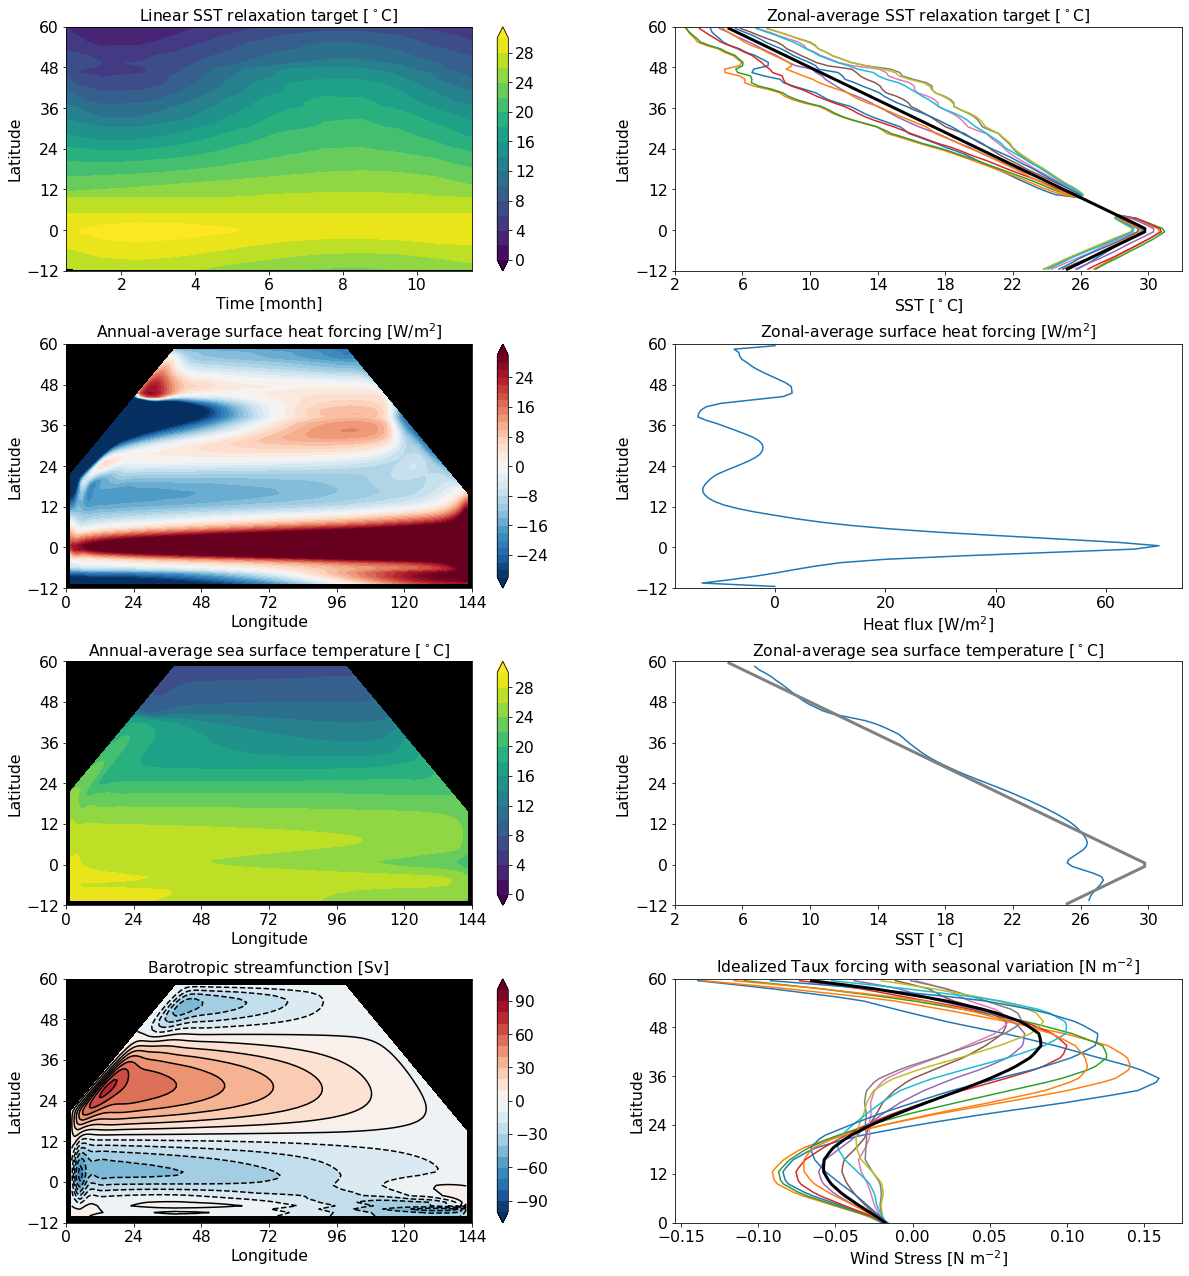

In [6]:
f2, f2ax = plt.subplots(figsize=(20,22),ncols=2,nrows=4)
f2cb =f2ax.copy()
f2cax=f2ax.copy()

f2cax[0,0]=f2ax[0,0].contourf(forcing.time,forcing.YC,forcing.sst_relax.mean('XC').T,
                        levels=np.arange(0,32,2),extend='both',cmap='viridis')
f2cb[0,0]=plt.colorbar(f2cax[0,0],ax=f2ax[0,0])
f2ax[0,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),
              title='Linear SST relaxation target [$^\circ$C]',
              xlabel='Time [month]',ylabel='Latitude',facecolor='black')
f2ax[0,1].plot(forcing.sst_relax.mean('XC').T,np.tile(forcing.YC,[12,1]).T)
f2ax[0,1].plot(forcing.sst_relax.mean({'XC','time'}).T,forcing.YC,color='black',linewidth=3)
f2ax[0,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(2,32),xticks=np.arange(2,34,4),
              title='Zonal-average SST relaxation target [$^\circ$C]',
              xlabel='SST [$^\circ$C]',ylabel='Latitude')
f2cax[1,0]=f2ax[1,0].contourf(grid_exp.lonc,grid_exp.latc,oce_surfdiag.TFLUX.isel(T=-1).T*grid_exp.cmask.isel(ZC=0),
                          levels=np.arange(-30,32,2),cmap='RdBu_r',extend='both')
f2cb[1,0]=plt.colorbar(f2cax[1,0],ax=f2ax[1,0])
f2ax[1,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
              title='Annual-average surface heat forcing [W/m$^2$]',
              xlabel='Longitude',ylabel='Latitude',facecolor='black')
f2ax[1,1].plot(oce_surfdiag.TFLUX.isel(T=-1).mean('XC'),grid_exp.latc.mean('XC'))
f2ax[1,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),
            title='Zonal-average surface heat forcing [W/m$^2$]',xlabel='Heat flux [W/m$^2$]',ylabel='Latitude')
f2cax[2,0]=f2ax[2,0].contourf(grid_exp.lonc,grid_exp.latc,ocediag.THETA.isel(T=-1,ZC=0).T*grid_exp.cmask.isel(ZC=0),
                          levels=np.arange(0,32,2),extend='both',cmap='viridis')
f2cb[2,0]=plt.colorbar(f2cax[2,0],ax=f2ax[2,0])
f2ax[2,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
              title='Annual-average sea surface temperature [$^\circ$C]',
              xlabel='Longitude',ylabel='Latitude',facecolor='black')
f2ax[2,1].plot((ocediag.THETA.isel(T=-1)*grid_exp.cmask).isel(ZC=0).mean('XC'),grid_exp.latc.mean('XC'))
f2ax[2,1].plot(forcing.sst_relax.mean({'XC','time'}).T,forcing.YC,color='grey',linewidth=3)
f2ax[2,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(2,32),xticks=np.arange(2,34,4),
            title='Zonal-average sea surface temperature [$^\circ$C]',xlabel='SST [$^\circ$C]',ylabel='Latitude')
f2cax[3,0]=f2ax[3,0].contourf(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2cb[3,0]=plt.colorbar(f2cax[3,0],ax=f2ax[3,0])
f2ax[3,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
              title='Barotropic streamfunction [Sv]',
              xlabel='Longitude',ylabel='Latitude',facecolor='black')
f2ax[3,0].contour(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                  levels=np.arange(-100,110,10),colors='black')
f2ax[3,1].plot(forcing.taux.mean('XC').T,np.tile(forcing.YC,[12,1]).T)
f2ax[3,1].plot(forcing.taux.mean({'XC','time'}).T,forcing.YC,color='black',linewidth=3)
f2ax[3,1].set(ylim=(0,60),yticks=np.arange(0,72,12),
            title='Idealized Taux forcing with seasonal variation [N m$^{-2}$]',xlabel='Wind Stress [N m$^{-2}$]',ylabel='Latitude')
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f2.savefig('/home/jml1/Jupyter_Notebooks/inp_phys.pdf',facecolor=f2.get_facecolor(), edgecolor='none',bbox_inches='tight')

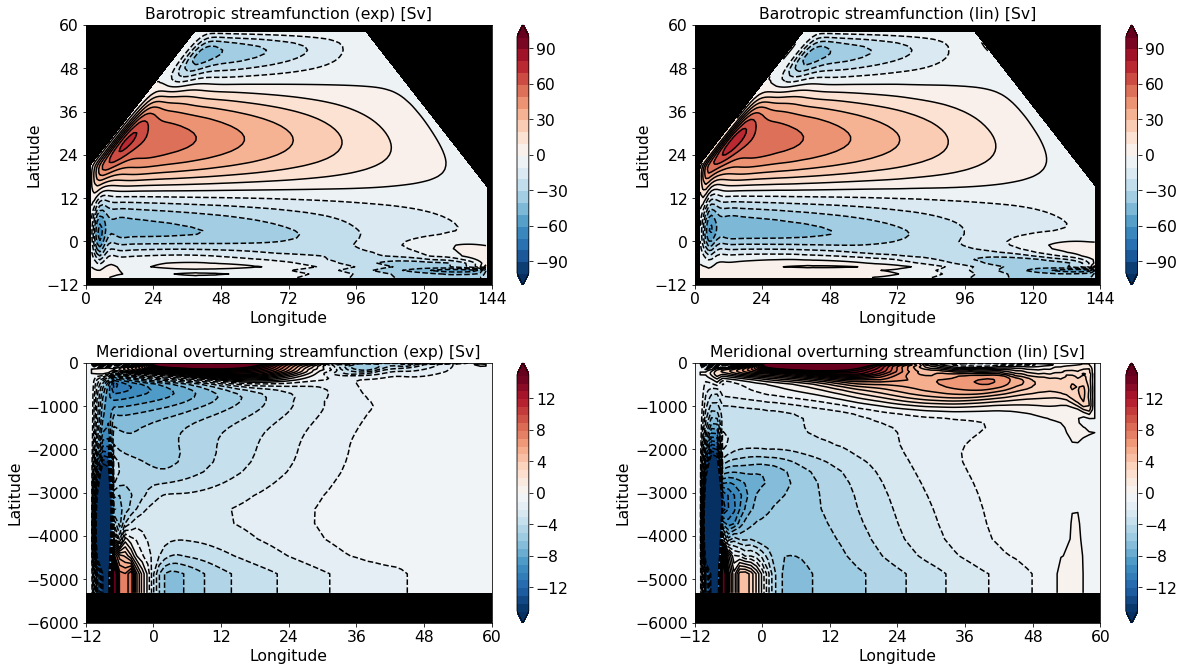

In [7]:
f2a, f2aax = plt.subplots(figsize=(20,11),ncols=2,nrows=2)
f2acb =f2aax.copy()
f2acax=f2aax.copy()
time=-1
f2acax[0,0]=f2aax[0,0].contourf(grid_exp.XG,grid_exp.YG,(baro.isel(T=time)/1e6),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2acb[0,0]=plt.colorbar(f2acax[0,0],ax=f2aax[0,0])
f2aax[0,0].contour(grid_exp.XG,grid_exp.YG,(baro.isel(T=time)/1e6),
                  levels=np.arange(-100,110,10),colors='black')
f2aax[0,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Barotropic streamfunction (exp) [Sv]',xlabel='Longitude',ylabel='Latitude')
f2acax[0,1]=f2aax[0,1].contourf(grid_lin.XG,grid_lin.YG,(lbaro.isel(T=time)/1e6),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2acb[0,1]=plt.colorbar(f2acax[0,1],ax=f2aax[0,1])
f2aax[0,1].contour(grid_lin.XG,grid_lin.YG,(lbaro.isel(T=time)/1e6),
                  levels=np.arange(-100,110,10),colors='black')
f2aax[0,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Barotropic streamfunction (lin) [Sv]',xlabel='Longitude',ylabel='Latitude')
f2acax[1,0]=f2aax[1,0].contourf(grid_exp.YG,grid_exp.ZC,(mres.isel(T=time)/1e6),
                   levels=np.arange(-15,16,1),extend='both',cmap='RdBu_r')
f2acb[1,0]=plt.colorbar(f2acax[1,0],ax=f2aax[1,0])
f2aax[1,0].contour(grid_exp.YG,grid_exp.ZC,(mres.isel(T=time)/1e6),
                  levels=np.arange(-15,16,1),colors='black')
f2aax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Meridional overturning streamfunction (exp) [Sv]',xlabel='Longitude',ylabel='Latitude')
f2acax[1,1]=f2aax[1,1].contourf(grid_lin.YG,grid_lin.ZC,(lmres.isel(T=time)/1e6),
                   levels=np.arange(-15,16,1),extend='both',cmap='RdBu_r')
f2acb[1,1]=plt.colorbar(f2acax[1,1],ax=f2aax[1,1])
f2aax[1,1].contour(grid_lin.YG,grid_lin.ZC,(lmres.isel(T=time)/1e6),
                  levels=np.arange(-15,16,1),colors='black')
f2aax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Meridional overturning streamfunction (lin) [Sv]',xlabel='Longitude',ylabel='Latitude')
f2aax=fix_contours(f2aax)
f2acb=fix_contours(f2acb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f2a.savefig('/home/jml1/Jupyter_Notebooks/inp_baroexplin.pdf',facecolor=f2a.get_facecolor(), edgecolor='none',bbox_inches='tight')

### Load climatologies for model-data comparisons

In [8]:
# World Ocean Atlas 2018 1° annual averages
urlwoat='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1955-2017/temp'
urlwoas='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1955-2017/salt'
urlwoap='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/phosphate'
urlwoan='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/nitrate'
urlwoao='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/oxygen'
urlwoau='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/aou'
urlwoax='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/o2sat'
urlwoai='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/silicate'

# Conversions
rhoconst     = 1024.5
perl_2_perkg = 1000/rhoconst # e.g. mol l-1 * 1000 l m-3 * 1/rho m3 kg-1 -> mol kg-1
perm3_2_perl = 1.0/1000      # e.g. mol m-3 * 1/1000 m3 l-1 -> mol l-1
molperm3_2_umolperkg=1e6/rhoconst

woa_data=xr.open_dataset(urlwoat,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)
woa_data['san'] = xr.open_dataset(urlwoas,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['san']
woa_data['pan'] = xr.open_dataset(urlwoap,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['pan']*perl_2_perkg/molperm3_2_umolperkg
woa_data['nan'] = xr.open_dataset(urlwoan,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['nan']*perl_2_perkg/molperm3_2_umolperkg
woa_data['oan'] = xr.open_dataset(urlwoao,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['oan']*molperm3_2_umolperkg/1000
woa_data['uan'] = xr.open_dataset(urlwoau,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['aan']*molperm3_2_umolperkg/1000
woa_data['xan'] = xr.open_dataset(urlwoax,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['oan']
woa_data['ian'] = xr.open_dataset(urlwoai,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['ian']*perl_2_perkg/molperm3_2_umolperkg
# centre the Pacific
woa_data=woa_data.assign_coords({"lon": (((woa_data['lon']+ 360) % 360))}).roll(lon=180,roll_coords=True)

yc,xc=np.meshgrid(woa_data.lat.values,woa_data.lon.values)
atlantic_mask, pacific_mask, indian_mask, so_mask, arctic_mask = mitgcm_tools.oceanmasks(xc,yc,np.isfinite(woa_data.tan).T.values)
woa_data['atlantic_mask'] = xr.DataArray(atlantic_mask, coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['pacific_mask']  = xr.DataArray(pacific_mask , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['indian_mask']   = xr.DataArray(indian_mask  , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['so_mask']       = xr.DataArray(so_mask      , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['arctic_mask']   = xr.DataArray(arctic_mask  , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])

urlmldt='http://apdrc.soest.hawaii.edu:80/dods/public_data/Ocean_Climatology/Ocean_Mixed_Layer_Depth/MLD_T02'
mld_data=xr.open_dataset(urlmldt,decode_times=False)

# centre the Pacific
mld_data=mld_data.assign_coords({"lon": (((mld_data['lon']+ 360) % 360))}).roll(lon=180,roll_coords=True)

yc,xc=np.meshgrid(mld_data.lat.values,mld_data.lon.values)
atlantic_mask, pacific_mask, indian_mask, so_mask, arctic_mask = mitgcm_tools.oceanmasks(xc,yc,np.isfinite(mld_data.mld).T.values)
mld_data['atlantic_mask'] = xr.DataArray(atlantic_mask, coords=[mld_data.lon.values, mld_data.lat.values, mld_data.time.values], dims=['lon', 'lat', 'time'])
mld_data['pacific_mask']  = xr.DataArray(pacific_mask , coords=[mld_data.lon.values, mld_data.lat.values, mld_data.time.values], dims=['lon', 'lat', 'time'])
mld_data['indian_mask']   = xr.DataArray(indian_mask  , coords=[mld_data.lon.values, mld_data.lat.values, mld_data.time.values], dims=['lon', 'lat', 'time'])
mld_data['so_mask']       = xr.DataArray(so_mask      , coords=[mld_data.lon.values, mld_data.lat.values, mld_data.time.values], dims=['lon', 'lat', 'time'])
mld_data['arctic_mask']   = xr.DataArray(arctic_mask  , coords=[mld_data.lon.values, mld_data.lat.values, mld_data.time.values], dims=['lon', 'lat', 'time'])

urlgloc='/home/jml1/Applications/Data/GLODAPv2.2016b.TCO2.nc'
urlgloa='/home/jml1/Applications/Data/GLODAPv2.2016b.TAlk.nc'
urlgloo='/home/jml1/Applications/Data/GLODAPv2.2016b.oxygen.nc'
urlglot='/home/jml1/Applications/Data/GLODAPv2.2016b.temperature.nc'
urlglos='/home/jml1/Applications/Data/GLODAPv2.2016b.salinity.nc'
glo_data=xr.open_dataset(urlgloc,decode_times=False).rename({'depth_surface':'depth'})
glo_data['TCO2']=glo_data['TCO2']/molperm3_2_umolperkg
glo_data['TALK']=xr.open_dataset(urlgloa,decode_times=False).rename({'depth_surface':'depth'})['TAlk']/molperm3_2_umolperkg
glo_data['TEMP']=xr.open_dataset(urlglot,decode_times=False).rename({'depth_surface':'depth'})['temperature']
glo_data['SALT']=xr.open_dataset(urlglos,decode_times=False).rename({'depth_surface':'depth'})['salinity']
glo_data['DOXY']=xr.open_dataset(urlgloo,decode_times=False).rename({'depth_surface':'depth'})['oxygen']/molperm3_2_umolperkg

glo_data=glo_data.assign_coords({"depth":glo_data.Depth})

yc,xc=np.meshgrid(glo_data.lat.values,glo_data.lon.values)
atlantic_mask, pacific_mask, indian_mask, so_mask, arctic_mask = mitgcm_tools.oceanmasks(xc,yc,np.isfinite(glo_data.TCO2).T.values)
glo_data['atlantic_mask'] = xr.DataArray(atlantic_mask, coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['pacific_mask']  = xr.DataArray(pacific_mask , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['indian_mask']   = xr.DataArray(indian_mask  , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['so_mask']       = xr.DataArray(so_mask      , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['arctic_mask']   = xr.DataArray(arctic_mask  , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])

read mask file at /home/jml1/Applications/Python/mitgcm_tools/woa13_basinmask_01.msk found by searching python path.
read mask file at /home/jml1/Applications/Python/mitgcm_tools/woa13_basinmask_01.msk found by searching python path.
read mask file at /home/jml1/Applications/Python/mitgcm_tools/woa13_basinmask_01.msk found by searching python path.


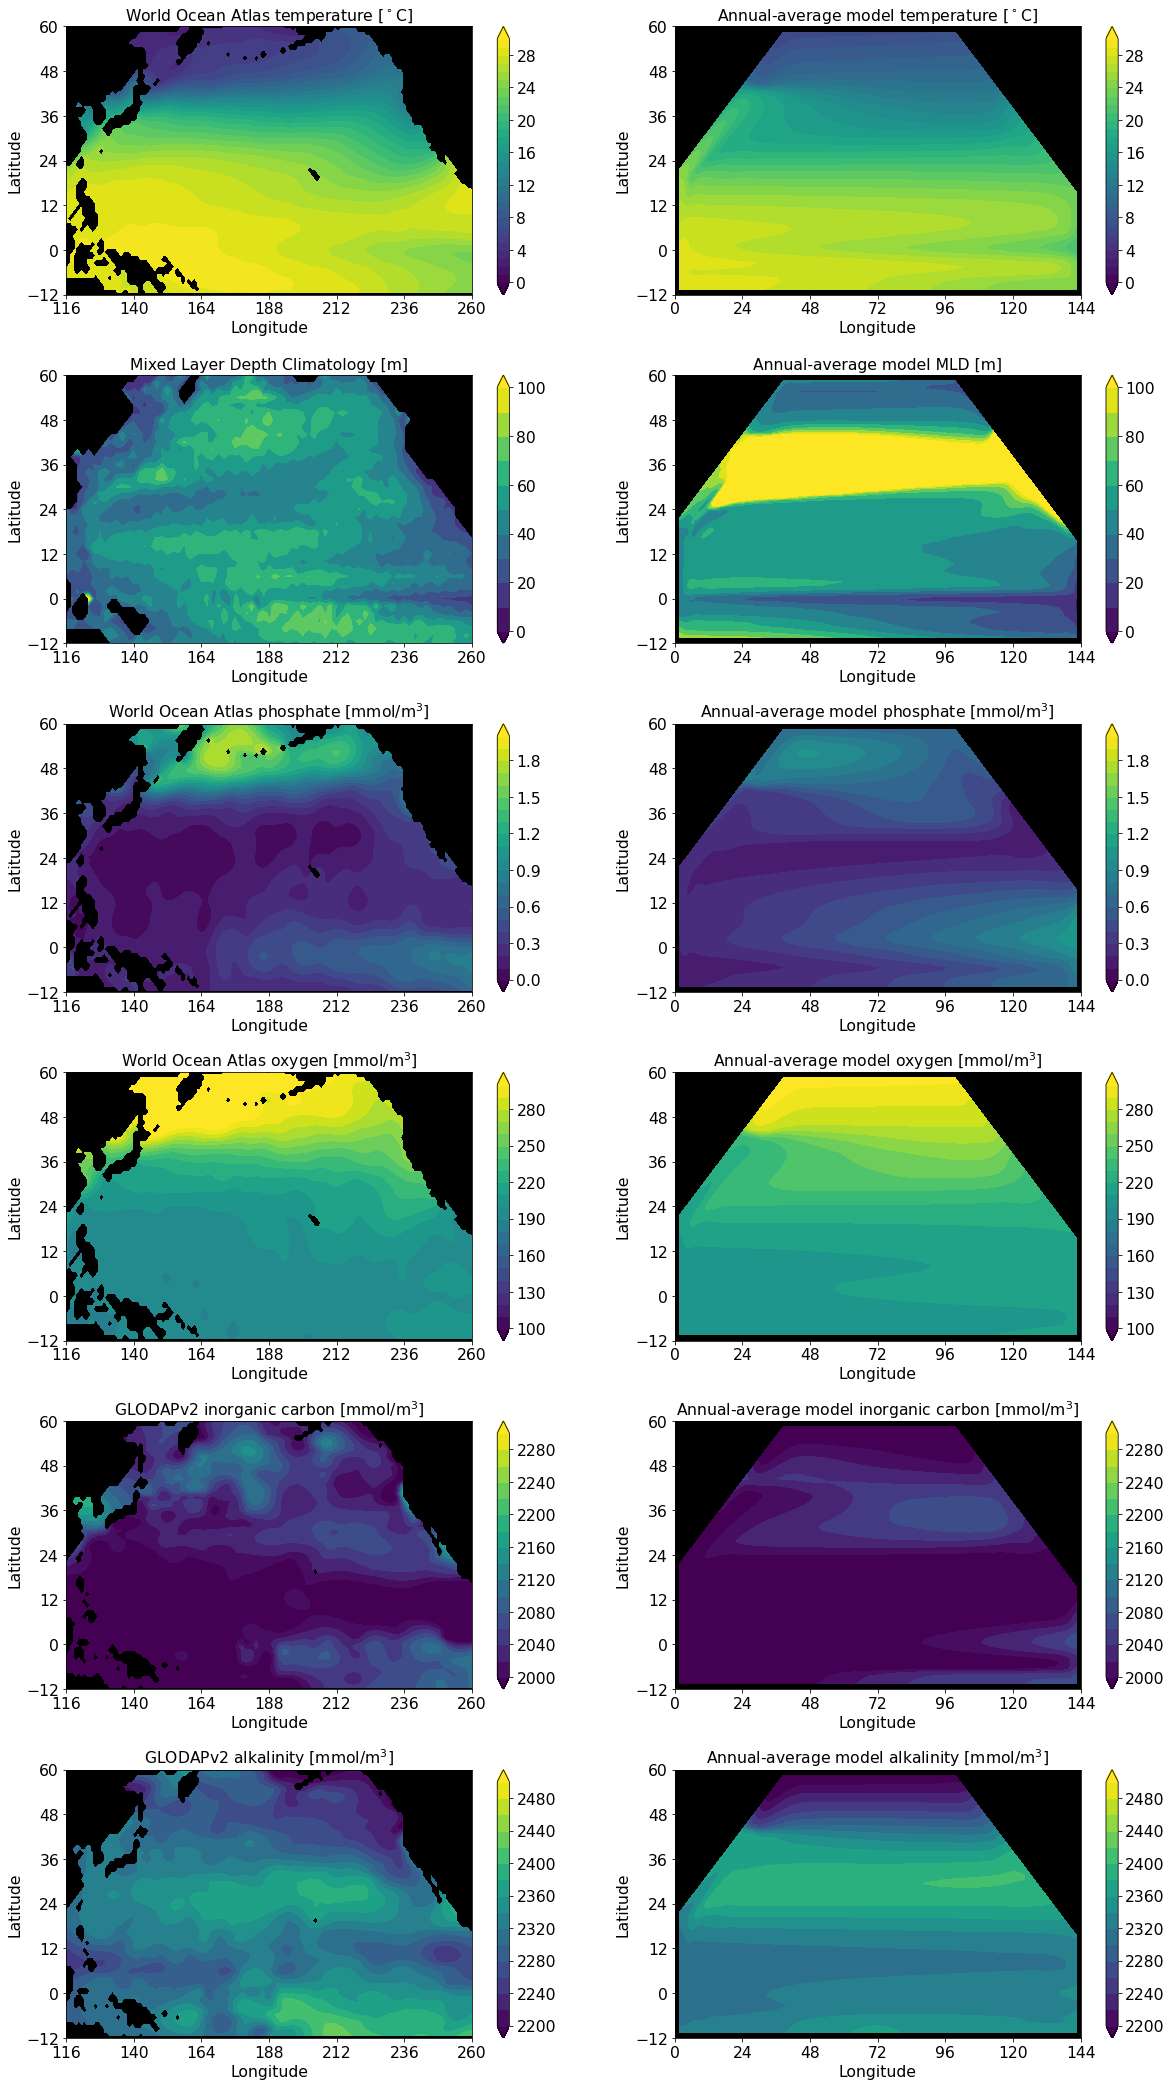

In [9]:
f3, f3ax = plt.subplots(figsize=(20,37),ncols=2,nrows=6)
f3cb =f3ax.copy()
f3cax=f3ax.copy()

# Sea surface temperature
f3cax[0,0]=f3ax[0,0].contourf(woa_data.lon,woa_data.lat,
                              woa_data.tan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).isel(depth=0),
                              levels=np.arange(0,31,1),cmap='viridis',extend='both')
f3cb[0,0]=plt.colorbar(f3cax[0,0],ax=f3ax[0,0])
f3ax[0,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='World Ocean Atlas temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
f3cax[0,1]=f3ax[0,1].contourf(grid_exp.XC,grid_exp.YC,(ocediag.THETA.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                          levels=np.arange(0,31,1),extend='both',cmap='viridis')
f3cb[0,1]=plt.colorbar(f3cax[0,1],ax=f3ax[0,1])
f3ax[0,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')

# Mixed Layer Depth
f3cax[1,0]=f3ax[1,0].contourf(mld_data.lon,mld_data.lat,
                              mld_data.mld.where(mld_data.pacific_mask==1).where(mld_data.lat >=-12).mean('time'),
                              levels=np.arange(0,110,10),cmap='viridis',extend='both')
f3cb[1,0]=plt.colorbar(f3cax[1,0],ax=f3ax[1,0])
f3ax[1,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='Mixed Layer Depth Climatology [m]',xlabel='Longitude',ylabel='Latitude')
f3cax[1,1]=f3ax[1,1].contourf(grid_exp.XC,grid_exp.YC,(oce_surfdiag.MXLDEPTH.isel(T=-1)*grid_exp.cmask.isel(ZC=0)),
                              levels=np.arange(0,110,10),extend='both',cmap='viridis')
f3cb[1,1]=plt.colorbar(f3cax[1,1],ax=f3ax[1,1])
f3ax[1,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model MLD [m]',xlabel='Longitude',ylabel='Latitude')

# Nitrate concentration
f3cax[2,0]=f3ax[2,0].contourf(woa_data.lon,woa_data.lat,
                              1000*woa_data.pan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).isel(depth=0),
                              levels=np.arange(0,2.1,0.1),cmap='viridis',extend='both')
f3cb[2,0]=plt.colorbar(f3cax[2,0],ax=f3ax[2,0])
f3ax[2,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='World Ocean Atlas phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[2,1]=f3ax[2,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(po4_flxdiag.TRAC03.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
f3cb[2,1]=plt.colorbar(f3cax[2,1],ax=f3ax[2,1])
f3ax[2,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Oxygen concentration
f3cax[3,0]=f3ax[3,0].contourf(woa_data.lon,woa_data.lat,
                              woa_data.oan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).isel(depth=0),
                              levels=np.arange(100,310,10),cmap='viridis',extend='both')
f3cb[3,0]=plt.colorbar(f3cax[3,0],ax=f3ax[3,0])
f3ax[3,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='World Ocean Atlas oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[3,1]=f3ax[3,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(do2_flxdiag.TRAC05.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(100,310,10),extend='both',cmap='viridis')
f3cb[3,1]=plt.colorbar(f3cax[3,1],ax=f3ax[3,1])
f3ax[3,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f3cax[4,0]=f3ax[4,0].contourf(glo_data.lon,glo_data.lat,
                              1000*glo_data.TCO2.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).isel(depth=0),
                              levels=np.arange(2000,2320,20),cmap='viridis',extend='both')
f3cb[4,0]=plt.colorbar(f3cax[4,0],ax=f3ax[4,0])
f3ax[4,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='GLODAPv2 inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[4,1]=f3ax[4,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(dic_flxdiag.TRAC01.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(2000,2320,20),extend='both',cmap='viridis')
f3cb[4,1]=plt.colorbar(f3cax[4,1],ax=f3ax[4,1])
f3ax[4,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Alk concentration
f3cax[5,0]=f3ax[5,0].contourf(glo_data.lon,glo_data.lat,
                              1000*glo_data.TALK.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).isel(depth=0),
                              levels=np.arange(2200,2520,20),cmap='viridis',extend='both')
f3cb[5,0]=plt.colorbar(f3cax[5,0],ax=f3ax[5,0])
f3ax[5,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='GLODAPv2 alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[5,1]=f3ax[5,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(alk_flxdiag.TRAC02.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(2200,2520,20),extend='both',cmap='viridis')
f3cb[5,1]=plt.colorbar(f3cax[5,1],ax=f3ax[5,1])
f3ax[5,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3ax = fix_contours(f3ax)
f3cb = fix_contours(f3cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f3.savefig('/home/jml1/Jupyter_Notebooks/inp_surf.pdf',facecolor=f3.get_facecolor(), edgecolor='none',bbox_inches='tight')

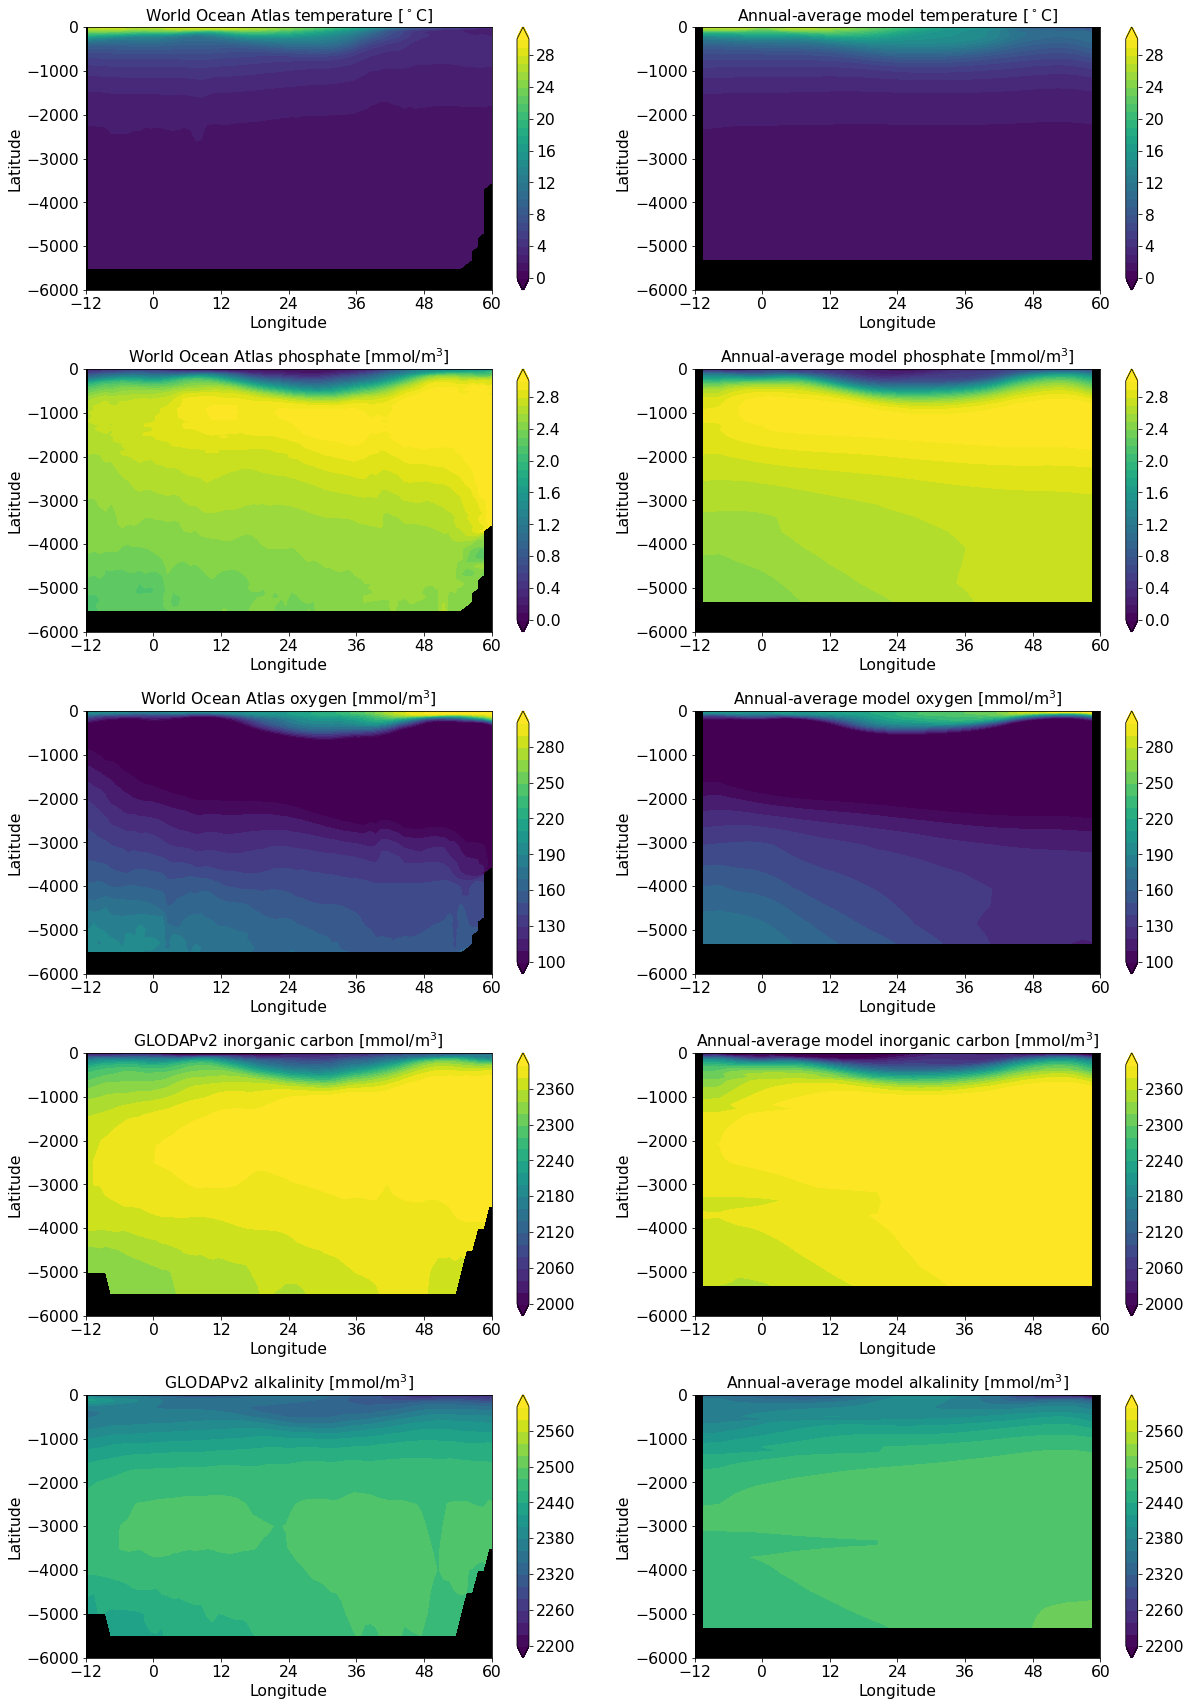

In [10]:
f4, f4ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f4cb =f4ax.copy()
f4cax=f4ax.copy()

with warnings.catch_warnings(): # these lines just make sure that the warnings dont clutter your notebook
    warnings.simplefilter("ignore")
    # Sea surface temperature
    f4cax[0,0]=f4ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                                  woa_data.tan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(0,31,1),cmap='viridis',extend='both')
    f4cb[0,0]=plt.colorbar(f4cax[0,0],ax=f4ax[0,0])
    f4ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
    f4cax[0,1]=f4ax[0,1].contourf(grid_exp.YC,grid_exp.ZC,(ocediag.THETA.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,31,1),extend='both',cmap='viridis')
    f4cb[0,1]=plt.colorbar(f4cax[0,1],ax=f4ax[0,1])
    f4ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
    # Phosphate concentration
    f4cax[1,0]=f4ax[1,0].contourf(woa_data.lat,-woa_data.depth,
                                  1000*woa_data.pan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(0,3.1,0.1),cmap='viridis',extend='both')
    f4cb[1,0]=plt.colorbar(f4cax[1,0],ax=f4ax[1,0])
    f4ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f4cax[1,1]=f4ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(po4_flxdiag.TRAC03.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,3.1,0.1),extend='both',cmap='viridis')
    f4cb[1,1]=plt.colorbar(f4cax[1,1],ax=f4ax[1,1])
    f4ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # Oxygen concentration
    f4cax[2,0]=f4ax[2,0].contourf(woa_data.lat,-woa_data.depth,
                                  woa_data.oan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(100,310,10),cmap='viridis',extend='both')
    f4cb[2,0]=plt.colorbar(f4cax[2,0],ax=f4ax[2,0])
    f4ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f4cax[2,1]=f4ax[2,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(do2_flxdiag.TRAC05.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(100,310,10),extend='both',cmap='viridis')
    f4cb[2,1]=plt.colorbar(f4cax[2,1],ax=f4ax[2,1])
    f4ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # DIC concentration
    f4cax[3,0]=f4ax[3,0].contourf(glo_data.lat,-glo_data.depth,
                                  1000*glo_data.TCO2.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                                  levels=np.arange(2000,2420,20),cmap='viridis',extend='both')
    f4cb[3,0]=plt.colorbar(f4cax[3,0],ax=f4ax[3,0])
    f4ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='GLODAPv2 inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f4cax[3,1]=f4ax[3,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(dic_flxdiag.TRAC01.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(2000,2420,20),extend='both',cmap='viridis')
    f4cb[3,1]=plt.colorbar(f4cax[3,1],ax=f4ax[3,1])
    f4ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # Alk concentration
    f4cax[4,0]=f4ax[4,0].contourf(glo_data.lat,-glo_data.depth,
                                  1000*glo_data.TALK.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                                  levels=np.arange(2200,2620,20),cmap='viridis',extend='both')
    f4cb[4,0]=plt.colorbar(f4cax[4,0],ax=f4ax[4,0])
    f4ax[4,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='GLODAPv2 alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f4cax[4,1]=f4ax[4,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(alk_flxdiag.TRAC02.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(2200,2620,20),extend='both',cmap='viridis')
    f4cb[4,1]=plt.colorbar(f4cax[4,1],ax=f4ax[4,1])
    f4ax[4,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f4ax=fix_contours(f4ax)
f4cb=fix_contours(f4cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f4.savefig('/home/jml1/Jupyter_Notebooks/inp_zonmean.pdf',facecolor=f4.get_facecolor(), edgecolor='none',bbox_inches='tight')

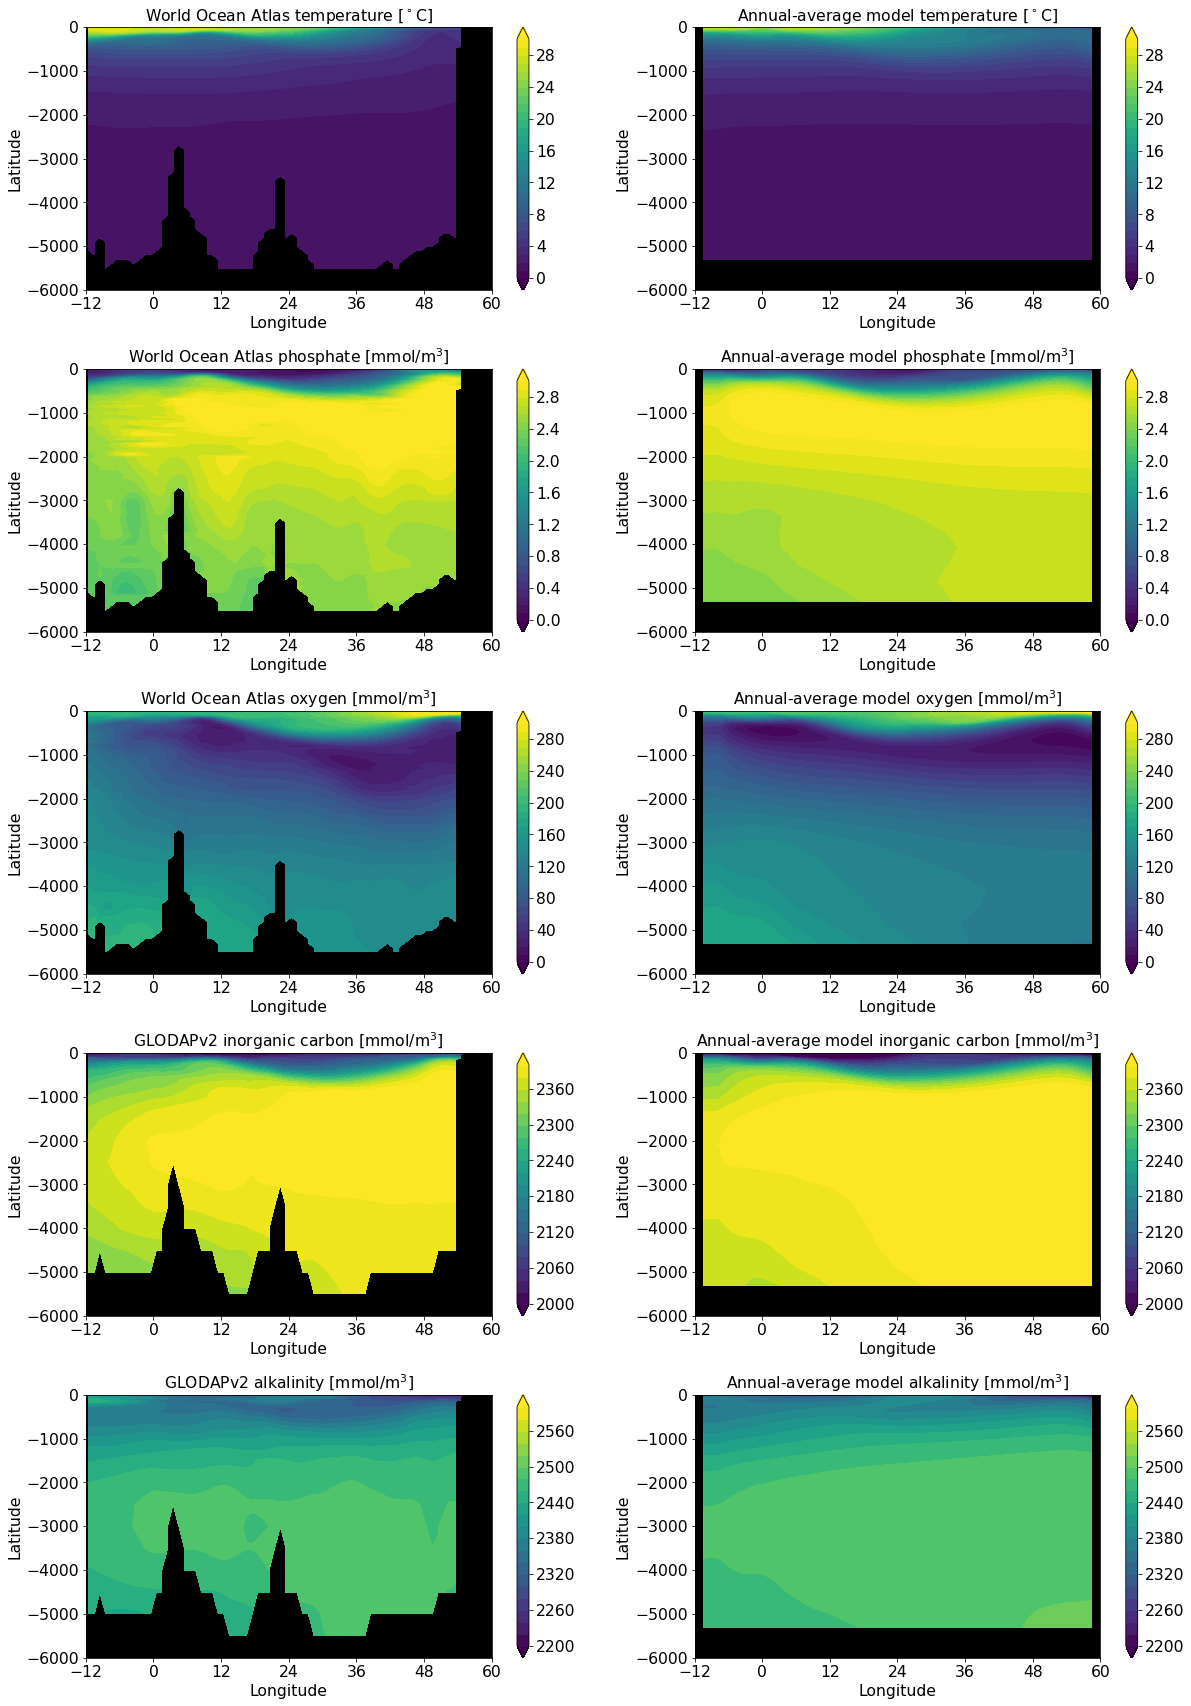

In [11]:
f5, f5ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f5cb =f5ax.copy()
f5cax=f5ax.copy()

# Sea surface temperature
f5cax[0,0]=f5ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.tan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(0,31,1),cmap='viridis',extend='both')
f5cb[0,0]=plt.colorbar(f5cax[0,0],ax=f5ax[0,0])
f5ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
f5cax[0,1]=f5ax[0,1].contourf(grid_exp.YC,grid_exp.ZC,(ocediag.THETA.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                          levels=np.arange(0,31,1),extend='both',cmap='viridis')
f5cb[0,1]=plt.colorbar(f5cax[0,1],ax=f5ax[0,1])
f5ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
# Phosphate concentration
f5cax[1,0]=f5ax[1,0].contourf(woa_data.lat,-woa_data.depth,
                              1000*woa_data.pan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(0,3.1,0.1),cmap='viridis',extend='both')
f5cb[1,0]=plt.colorbar(f5cax[1,0],ax=f5ax[1,0])
f5ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[1,1]=f5ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(po4_flxdiag.TRAC03.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(0,3.1,0.1),extend='both',cmap='viridis')
f5cb[1,1]=plt.colorbar(f5cax[1,1],ax=f5ax[1,1])
f5ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Oxygen concentration
f5cax[2,0]=f5ax[2,0].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.oan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(0,310,10),cmap='viridis',extend='both')
f5cb[2,0]=plt.colorbar(f5cax[2,0],ax=f5ax[2,0])
f5ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[2,1]=f5ax[2,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(do2_flxdiag.TRAC05.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(0,310,10),extend='both',cmap='viridis')
f5cb[2,1]=plt.colorbar(f5cax[2,1],ax=f5ax[2,1])
f5ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f5cax[3,0]=f5ax[3,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*glo_data.TCO2.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(2000,2420,20),cmap='viridis',extend='both')
f5cb[3,0]=plt.colorbar(f5cax[3,0],ax=f5ax[3,0])
f5ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[3,1]=f5ax[3,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(dic_flxdiag.TRAC01.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(2000,2420,20),extend='both',cmap='viridis')
f5cb[3,1]=plt.colorbar(f5cax[3,1],ax=f5ax[3,1])
f5ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Alk concentration
f5cax[4,0]=f5ax[4,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*glo_data.TALK.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(2200,2620,20),cmap='viridis',extend='both')
f5cb[4,0]=plt.colorbar(f5cax[4,0],ax=f5ax[4,0])
f5ax[4,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[4,1]=f5ax[4,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(alk_flxdiag.TRAC02.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(2200,2620,20),extend='both',cmap='viridis')
f5cb[4,1]=plt.colorbar(f5cax[4,1],ax=f5ax[4,1])
f5ax[4,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5ax=fix_contours(f5ax)
f5cb=fix_contours(f5cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f5.savefig('/home/jml1/Jupyter_Notebooks/inp_zon160W.pdf',facecolor=f2.get_facecolor(), edgecolor='none',bbox_inches='tight')

### Diagnose preformed and regenerated tracers

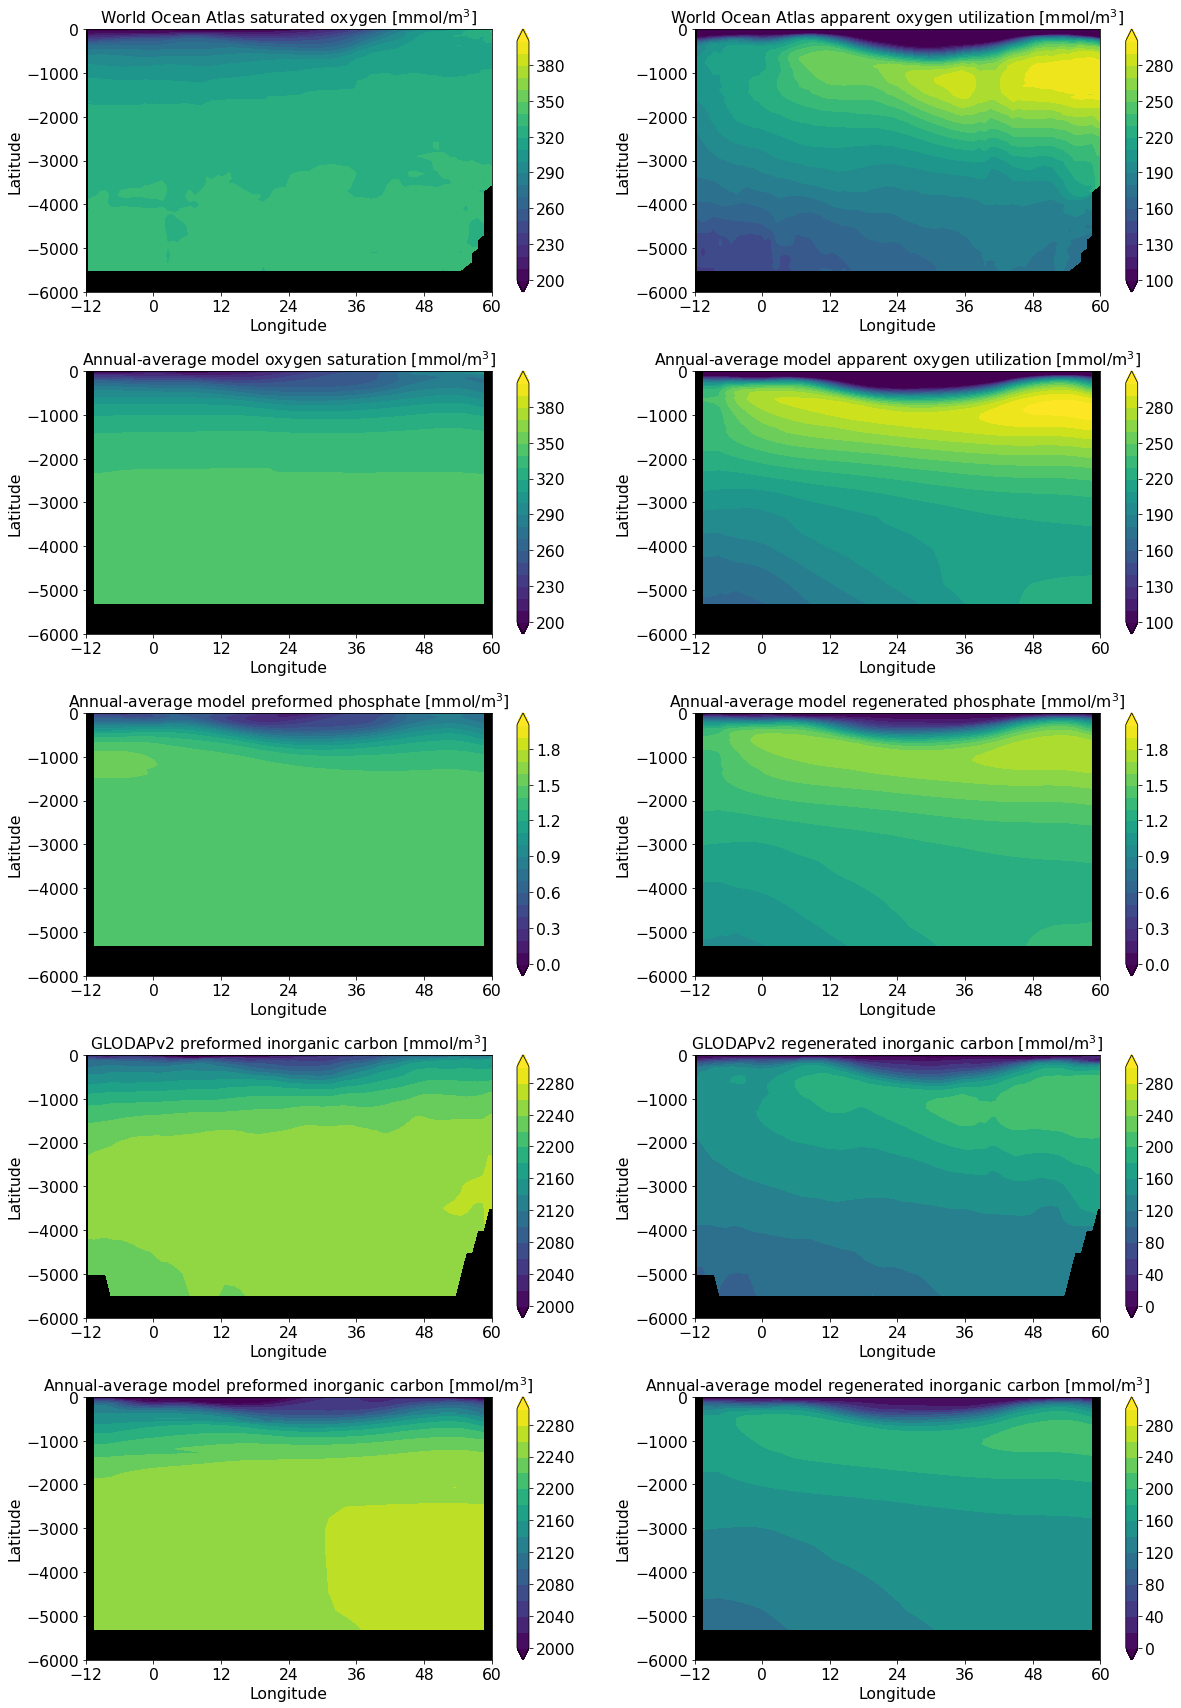

In [15]:
woa_data['xan']=woa_data['oan']+woa_data['uan']

do2_flxdiag['TRAC05sat']=mitgcm_tools.saturated_oxygen(ocediag['THETA'],35*xr.ones_like(ocediag['THETA']))
do2_flxdiag['TRAC05aou']=do2_flxdiag['TRAC05sat']-do2_flxdiag['TRAC05']

glo_data['OXYSAT']=mitgcm_tools.saturated_oxygen(glo_data['TEMP'],glo_data['SALT'],gsw=True)
glo_data['AOXYU']=glo_data['OXYSAT']-glo_data['DOXY']

f6, f6ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f6cb =f6ax.copy()
f6cax=f6ax.copy()

with warnings.catch_warnings(): # these lines just make sure that the warnings dont clutter your notebook
    warnings.simplefilter("ignore")
    # Observations
    f6cax[0,0]=f6ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                                  (woa_data.xan).where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(200,410,10),cmap='viridis',extend='both')
    f6cb[0,0]=plt.colorbar(f6cax[0,0],ax=f6ax[0,0])
    f6ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas saturated oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f6cax[0,1]=f6ax[0,1].contourf(woa_data.lat,-woa_data.depth,
                                  woa_data.uan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(100,310,10),cmap='viridis',extend='both')
    f6cb[0,1]=plt.colorbar(f6cax[0,1],ax=f6ax[0,1])
    f6ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas apparent oxygen utilization [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # Oxygen concentration
    f6cax[1,0]=f6ax[1,0].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(do2_flxdiag.TRAC05sat.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(200,410,10),extend='both',cmap='viridis')
    f6cb[1,0]=plt.colorbar(f6cax[1,0],ax=f6ax[1,0])
    f6ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model oxygen saturation [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f6cax[1,1]=f6ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(do2_flxdiag.TRAC05aou.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(100,310,10),extend='both',cmap='viridis')
    f6cb[1,1]=plt.colorbar(f6cax[1,1],ax=f6ax[1,1])
    f6ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model apparent oxygen utilization [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # Phosphate concentration
    f6cax[2,0]=f6ax[2,0].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*((po4_flxdiag.TRAC03-(1/170)*do2_flxdiag['TRAC05aou']).isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
    f6cb[2,0]=plt.colorbar(f6cax[2,0],ax=f6ax[2,0])
    f6ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model preformed phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f6cax[2,1]=f6ax[2,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(((1/170)*do2_flxdiag['TRAC05aou'].isel(T=-1))*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
    f6cb[2,1]=plt.colorbar(f6cax[2,1],ax=f6ax[2,1])
    f6ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                  title='Annual-average model regenerated phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # GLODAP DIC concentration
    f6cax[3,0]=f6ax[3,0].contourf(glo_data.lat,-glo_data.depth,
                                  1000*(glo_data.TCO2-(117/170)*glo_data.AOXYU).where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                                  levels=np.arange(2000,2320,20),cmap='viridis',extend='both')
    f6cb[3,0]=plt.colorbar(f6cax[3,0],ax=f6ax[3,0])
    f6ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='GLODAPv2 preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f6cax[3,1]=f6ax[3,1].contourf(glo_data.lat,-glo_data.depth,
                                  1000*(117/170)*glo_data.AOXYU.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                                  levels=np.arange(0,320,20),cmap='viridis',extend='both')
    f6cb[3,1]=plt.colorbar(f6cax[3,1],ax=f6ax[3,1])
    f6ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='GLODAPv2 regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # DIC concentration
    f6cax[4,0]=f6ax[4,0].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*((dic_flxdiag.TRAC01-(117/170)*do2_flxdiag.TRAC05aou).isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(2000,2320,20),extend='both',cmap='viridis')
    f6cb[4,0]=plt.colorbar(f6cax[4,0],ax=f6ax[4,0])
    f6ax[4,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f6cax[4,1]=f6ax[4,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*((117/170)*do2_flxdiag.TRAC05aou.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,320,20),extend='both',cmap='viridis')
    f6cb[4,1]=plt.colorbar(f6cax[4,1],ax=f6ax[4,1])
    f6ax[4,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6ax=fix_contours(f6ax)
f6cb=fix_contours(f6cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f6.savefig('/home/jml1/Jupyter_Notebooks/inp_zonmean_pref.pdf',facecolor=f6.get_facecolor(), edgecolor='none',bbox_inches='tight')

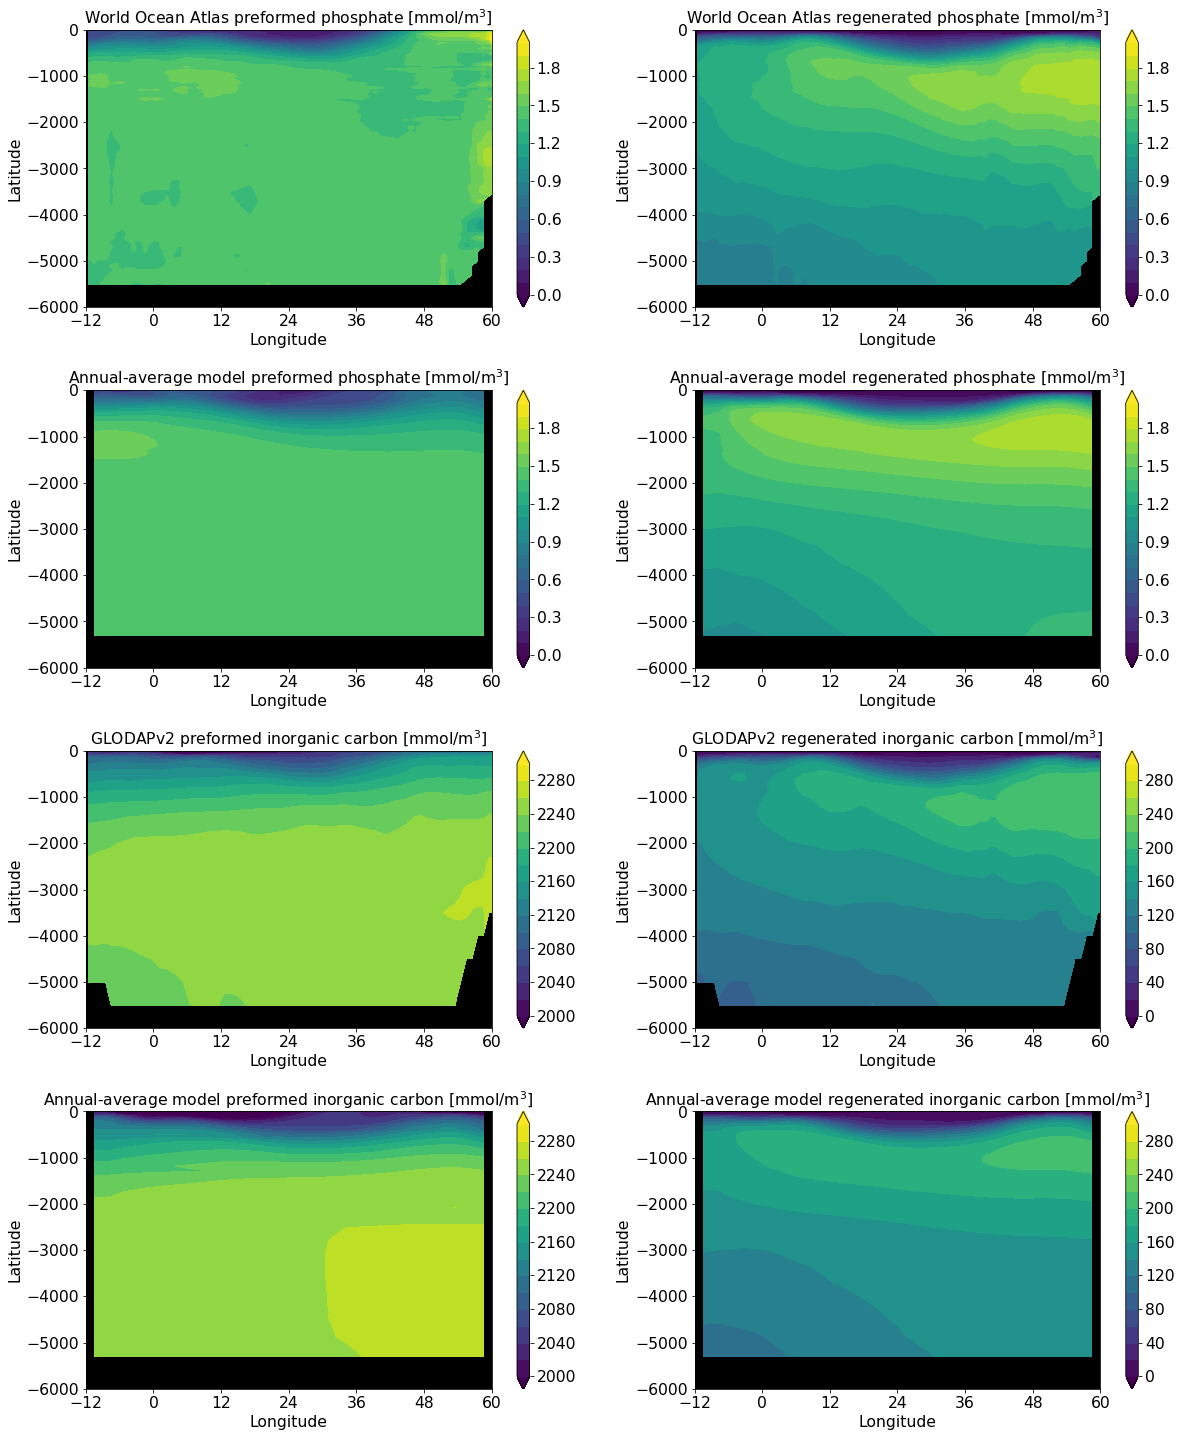

In [13]:
f7, f7ax = plt.subplots(figsize=(20,25),ncols=2,nrows=4)
f7cb =f7ax.copy()
f7cax=f7ax.copy()

with warnings.catch_warnings(): # these lines just make sure that the warnings dont clutter your notebook
    warnings.simplefilter("ignore")
    # Observations
    f7cax[0,0]=f7ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                                  ((1000*woa_data.pan-(1/170)*woa_data.uan)).where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(0,2.1,0.1),cmap='viridis',extend='both')
    f7cb[0,0]=plt.colorbar(f7cax[0,0],ax=f7ax[0,0])
    f7ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas preformed phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f7cax[0,1]=f7ax[0,1].contourf(woa_data.lat,-woa_data.depth,
                                  (1/170)*woa_data.uan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                                  levels=np.arange(0,2.1,0.1),cmap='viridis',extend='both')
    f7cb[0,1]=plt.colorbar(f7cax[0,1],ax=f7ax[0,1])
    f7ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='World Ocean Atlas regenerated phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # Phosphate concentration
    f7cax[1,0]=f7ax[1,0].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*((po4_flxdiag.TRAC03-(1/170)*do2_flxdiag['TRAC05aou']).isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
    f7cb[1,0]=plt.colorbar(f7cax[1,0],ax=f7ax[1,0])
    f7ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model preformed phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f7cax[1,1]=f7ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*(((1/170)*do2_flxdiag['TRAC05aou'].isel(T=-1))*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
    f7cb[1,1]=plt.colorbar(f7cax[1,1],ax=f7ax[1,1])
    f7ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                  title='Annual-average model regenerated phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # GLODAP DIC concentration
    f7cax[2,0]=f7ax[2,0].contourf(glo_data.lat,-glo_data.depth,
                                  1000*(glo_data.TCO2-(117/170)*glo_data.AOXYU).where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                                  levels=np.arange(2000,2320,20),cmap='viridis',extend='both')
    f7cb[2,0]=plt.colorbar(f7cax[2,0],ax=f7ax[2,0])
    f7ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='GLODAPv2 preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f7cax[2,1]=f7ax[2,1].contourf(glo_data.lat,-glo_data.depth,
                                  1000*(117/170)*glo_data.AOXYU.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                                  levels=np.arange(0,320,20),cmap='viridis',extend='both')
    f7cb[2,1]=plt.colorbar(f7cax[2,1],ax=f7ax[2,1])
    f7ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='GLODAPv2 regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    # DIC concentration
    f7cax[3,0]=f7ax[3,0].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*((dic_flxdiag.TRAC01-(117/170)*do2_flxdiag.TRAC05aou).isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(2000,2320,20),extend='both',cmap='viridis')
    f7cb[3,0]=plt.colorbar(f7cax[3,0],ax=f7ax[3,0])
    f7ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
    f7cax[3,1]=f7ax[3,1].contourf(grid_exp.YC,grid_exp.ZC,
                                  1000*((117/170)*do2_flxdiag.TRAC05aou.isel(T=-1)*grid_exp.cmask).mean('XC'),
                                  levels=np.arange(0,320,20),extend='both',cmap='viridis')
    f7cb[3,1]=plt.colorbar(f7cax[3,1],ax=f7ax[3,1])
    f7ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
                title='Annual-average model regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f7ax=fix_contours(f7ax)
f7cb=fix_contours(f7cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f7.savefig('/home/jml1/Jupyter_Notebooks/inp_zonmean_pref2.pdf',facecolor=f7.get_facecolor(), edgecolor='none',bbox_inches='tight')

In [16]:
eccov4_vvelmas=xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/ECCO/ECCO-V4r4/VVELMASS',decode_times=False)
eccov4_vvelstr=xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/ECCO/ECCO-V4r4/VVELSTAR',decode_times=False)


In [17]:
eccov4_vvelmas

<xarray.Dataset>
Dimensions:   (lat: 360, lev: 50, lon: 720, time: 312)
Coordinates:
  * time      (time) float64 7.272e+05 7.272e+05 ... 7.366e+05 7.367e+05
  * lev       (lev) float64 5.0 15.0 25.0 35.0 ... 5.039e+03 5.461e+03 5.906e+03
  * lat       (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Data variables:
    vvelmass  (time, lev, lat, lon) float32 ...
Attributes:
    title:          ECCO-V4r4 Monthly Y-Comp of Geometry-Weighted Velocity
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/ecco_v4r4.php
    history:        Wed Feb 10 14:34:42 HST 2021 : imported by GrADS Data Ser...

In [16]:
import numpy   as np
import xarray  as xr
import xmitgcm as xg
import xgcm

eccov4r3 = xg.open_mdsdataset('/pool001/jml1/ECCOv4/run_nlfs/', prefix=["trsp_3d_set1","state_3d_set1"], iters='all', read_grid=True,# grid_dir=csgrid_dir, 
                          delta_t=3600, ref_date='1992-1-1 12:0:0', calendar='gregorian', geometry='llc',
                          chunks={'face':1, 'k':-1},
                          grid_vars_to_coords=True, ignore_unknown_vars=False)

# Add vertical distances as a gridded coordinate.                   
eccov4r3=eccov4r3.assign_coords({'dzC' :eccov4r3['maskC'] * eccov4r3['drF'],
                                 'dzW' :eccov4r3['maskW'] * eccov4r3['drF'],
                                 'dzS' :eccov4r3['maskS'] * eccov4r3['drF'] })

# Helps XGCM work out x, y, z distances and areas
metrics = {
            ('X',): ['dxC', 'dxG'], # X distances
            ('Y',): ['dyC', 'dyG'], # Y distances
            ('Z',): ['dzW', 'dzS', 'dzC'], # Z distances
            ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
          }

# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

# create the grid object
xgrd_ecco = xgcm.Grid(eccov4r3, periodic=['X'], metrics=metrics, face_connections=face_connections)

In [17]:
#eccov4r3['GM_UVEL']=(eccov4r3['GM_PsiX'].differentiate('ZL').interp(ZL=vvel.ZC)*-1).chunk({'T':2})
#eccov4r3['GM_VVEL']=(eccov4r3['GM_PsiY'].differentiate('ZL').interp(ZL=vvel.ZC)*-1).chunk({'T':2})

eccov4r3['GM_UVEL']=xgrd_ecco.derivative(eccov4r3['GM_PsiX'],'Z',boundary='fill',fill_value=0)*-1 #.chunk({'T':2})
eccov4r3['GM_VVEL']=xgrd_ecco.derivative(eccov4r3['GM_PsiY'],'Z',boundary='fill',fill_value=0)*-1 #.chunk({'T':2})

eccov4r3['URES']=eccov4r3['GM_UVEL']+eccov4r3['UVELMASS']
eccov4r3['VRES']=eccov4r3['GM_VVEL']+eccov4r3['VVELMASS']


In [3]:
# Calculate overturning streamfunction
# Meridional Eulerian SF: calculate first intergral and then second integral (partial summation) over levels
# eccov4r3['meridEul'] =  (eccov4r3['VVELMASS']*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.HFacS*eccov4r3.dxG*eccov4r3.drF).sum('XC').cumsum('ZC')
# eccov4r3['meridEdd'] =  (eccov4r3['GM_VVEL' ]*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.HFacS*eccov4r3.dxG*eccov4r3.drF).sum('XC').cumsum('ZC')
# eccov4r3['meridRes'] =  (eccov4r3['VRES'    ]*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.HFacS*eccov4r3.dxG*eccov4r3.drF).sum('XC').cumsum('ZC')
#mres = meul+medd
eccov4r3['meridEul'] =  (xgrd_ecco.integrate(eccov4r3['VVELMASS'], 'X')*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.drF).sum(dim='k') - (xgrd_ecco.integrate(eccov4r3['VVELMASS'], 'X')*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.drF).cumsum(dim='k')
eccov4r3['meridEdd'] =  (xgrd_ecco.integrate(eccov4r3['GM_VVEL' ], 'X')*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.drF).sum(dim='k') - (xgrd_ecco.integrate(eccov4r3['GM_VVEL' ], 'X')*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.drF).cumsum(dim='k')
eccov4r3['meridRes'] =  (xgrd_ecco.integrate(eccov4r3['VRES'    ], 'X')*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.drF).sum(dim='k') - (xgrd_ecco.integrate(eccov4r3['VRES'    ], 'X')*np.cos(eccov4r3.coords['YG']*(np.pi/180))*eccov4r3.drF).cumsum(dim='k')

In [4]:
# Zonal Eulerian SF: calculate first intergral and then second integral (partial summation) over levels
# eccov4r3['zonalEul'] = -(eccov4r3['UVELMASS']*eccov4r3.HFacW*eccov4r3.dyG*eccov4r3.drF).sum('YC').cumsum('ZC')
# eccov4r3['zonalEdd'] = -(eccov4r3['GM_UVEL' ]*eccov4r3.HFacW*eccov4r3.dyG*eccov4r3.drF).sum('YC').cumsum('ZC')
# eccov4r3['zonalRes'] = -(eccov4r3['URES'    ]*eccov4r3.HFacW*eccov4r3.dyG*eccov4r3.drF).sum('YC').cumsum('ZC')
#zres = zeul+zedd
eccov4r3['zonalEul'] = -xgrd_ecco.cumsum(xgrd_ecco.integrate(eccov4r3['UVELMASS'], 'Y')*eccov4r3.drF, 'Z', boundary='fill', fill_value=0)
eccov4r3['zonalEdd'] = -xgrd_ecco.cumsum(xgrd_ecco.integrate(eccov4r3['GM_UVEL' ], 'Y')*eccov4r3.drF, 'Z', boundary='fill', fill_value=0)
eccov4r3['zonalRes'] = -xgrd_ecco.cumsum(xgrd_ecco.integrate(eccov4r3['URES'    ], 'Y')*eccov4r3.drF, 'Z', boundary='fill', fill_value=0)

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


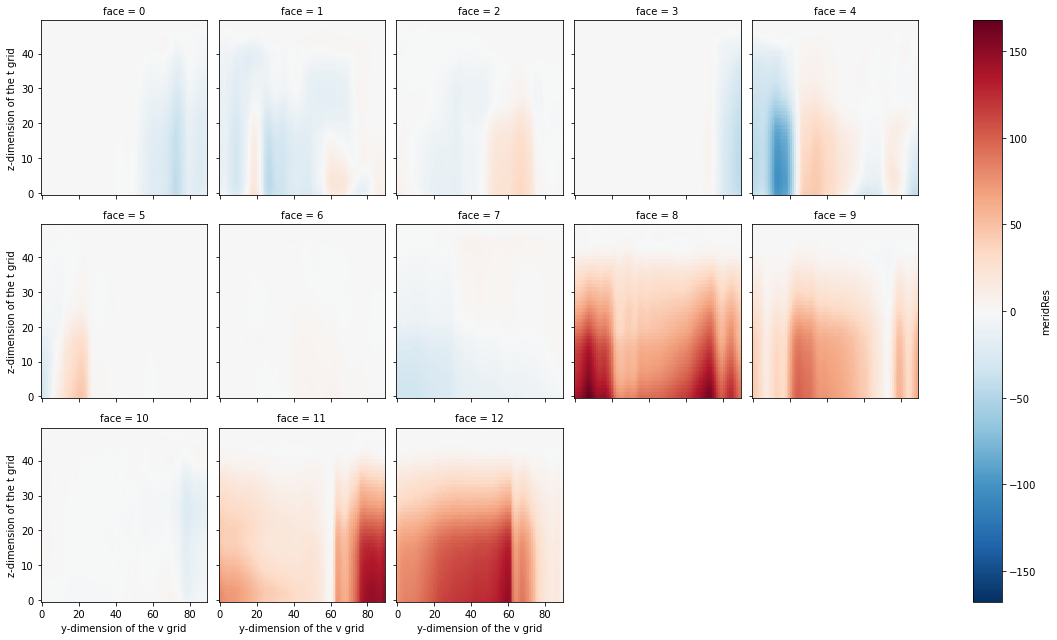

In [26]:
(eccov4r3['meridRes'].T*1e-6).isel(time=slice(-12,-1)).mean('time').plot(col='face',col_wrap=5)

In [18]:
eccov4r3

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-02-01 ... 2015-12-31T12:00:00
    XC         (face, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC         (face, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG         (face, j_g, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS         (face, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN         (face, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z          (k) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) >f8 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    rA         (face, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxG        (face, j_g, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyG        (face, j, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth      (face, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxC        (face, j, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyC        (face, j_g, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drC        (k_p1) float64 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefC     (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    hFacC      (k, face, j, i) >f8 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    hFacW      (k, face, j, i_g) >f8 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    hFacS      (k, face, j_g, i) >f8 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskC      (k, face, j, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskW      (k, face, j, i_g) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskS      (k, face, j_g, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlC  (k, face, j, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlS  (k, face, j_g, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, face, j, i_g) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    dzC        (k, face, j, i) float64 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    dzW        (k, face, j, i_g) float64 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    dzS        (k, face, j_g, i) float64 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
Data variable

In [8]:
# Barotropic Streamfunction
eccov4r3['bmask']=xr.ones_like(eccov4r3['hFacW']).where(eccov4r3['maskW'],1,0).interp(j=eccov4r3.coords['j_g'],method='nearest')

#eccov4r3['bUvel']=(((eccov4r3['URES' ] * eccov4r3.HFacW * eccov4r3.drF * eccov4r3.dyG).sum(dim='ZC').sel(YC=slice(None, None, -1)) .cumsum('YC')).sel(YC=slice(None, None, -1)).interp(YC=eccov4r3.coords['YG'],method='linear'))*eccov4r3['bmask'].isel(ZC=0)
#eccov4r3['bVvel']=(  eccov4r3['VRES' ] * np.cos(eccov4r3.coords['YG']*(np.pi/180)) * eccov4r3.HFacS * eccov4r3.drF * eccov4r3.dxG).sum(dim='ZC').cumsum('XC').interp(XC=eccov4r3.coords['XG'],method='linear')*eccov4r3['bmask'].isel(ZC=0)
#eccov4r3['bRes' ]=(ubaro+vbaro)

eccov4r3['bUvel']= xgrd_ecco.cumint((eccov4r3.hFacW * eccov4r3['URES'] * eccov4r3.drF).sum(dim='k'),'Y', boundary='fill', fill_value=0)*eccov4r3['bmask'].isel(k=0)
eccov4r3['bVvel']= xgrd_ecco.cumint((np.cos(eccov4r3.coords['YG']*(np.pi/180)).interp(i_g=eccov4r3.coords['i'],method='linear') * 
                                     eccov4r3.hFacS * eccov4r3['VRES'] * eccov4r3.drF).sum(dim='k'),'X', boundary='fill', fill_value=0)*eccov4r3['bmask'].isel(k=0)

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


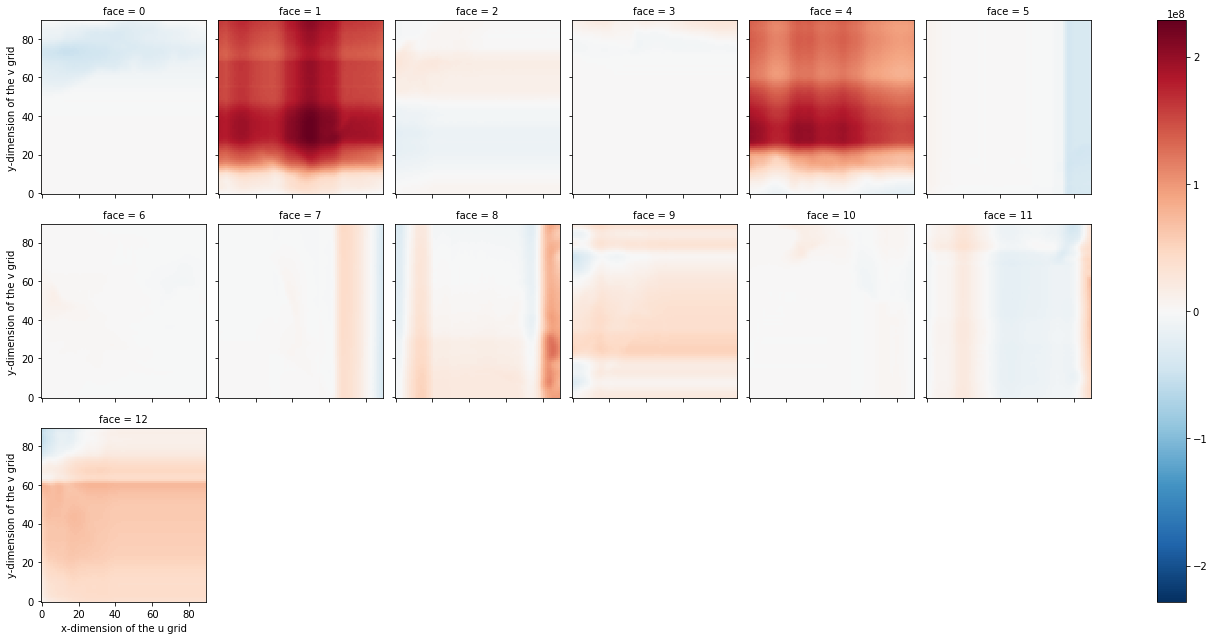

In [12]:
(eccov4r3['bUvel']+eccov4r3['bVvel']).isel(time=slice(-12,-1)).mean("time").where(eccov4r3['bmask'].isel(k=0),1,0).plot(col="face",col_wrap=6)

In [33]:
import ecco_v4_py as ev4
tmp=eccov4r3.rename({'face':'tile'}).isel(time=slice(-12,None)).mean("time")
moc=ev4.meridional_trsp_at_depth(tmp['URES'].where(tmp.maskW), tmp['VRES'].where(tmp.maskS), np.arange(-89,91,2), tmp[['YC','maskW','maskS']],basin_name='atl', grid=None, less_output=False)

load_binary_array: loading file /home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/ecco_v4_py/../binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
load_binary_array: loading file /home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/ecco_v4_py/../binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
calculating transport for latitutde  -89


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -87


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -85


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -83


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -81


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -79


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -77


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -75


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -73


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -71


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -69


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -67


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -65


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -63


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -61


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -59


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -57


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -55


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -53


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -51


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -49


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -47


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -45


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -43


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -41


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -39


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -37


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -35


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -33


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -31


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -29


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -27


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -25


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -23


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -21


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -19


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -17


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -15


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -13


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -11


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -9


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -7


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -5


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -3


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  -1


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  1


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  3


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  5


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  7


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  9


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  11


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  13


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  15


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  17


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  19


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  21


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  23


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  25


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  27


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  29


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  31


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  33


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  35


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  37


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  39


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  41


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  43


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  45


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  47


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  49


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  51


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  53


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  55


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  57


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  59


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  61


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  63


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  65


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  67


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  69


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  71


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  73


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  75


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  77


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  79


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  81


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  83


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  85


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  87


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


calculating transport for latitutde  89


/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


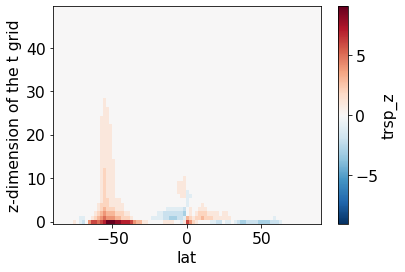

In [35]:
moc.trsp_z.plot()